# Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import prepare as p
import explore as e

# Acquire

* This dataset was downloaded from [Kaggle](https://www.kaggle.com/datasets/mahirahmzh/starbucks-customer-retention-malaysia-survey)
* I used the unencoded version of the data
* Each observation is a survey filled out by a Starbucks customer
* Each feature is a question asked in the survey or a timestamp for that survey
* This dataset contains 21 features and 122 observations

[Income Classification in Malaysia: What is B40, M40, and T20](https://www.iproperty.com.my/guides/what-is-b40-m40-t20-in-malaysia/) by Rebecca Hani Romeli was referenced for information regarding Malaysian currency and income levels

In [2]:
df = pd.read_csv('starbucks_survey.csv')

# Prepare

In [3]:
df = p.prepare_customer_survey(df)
df.head()

,gender,age_group,employment_status,annual_income_group,visit_frequency,dining_type,visit_length,distance_away,membership_card,most_frequent_purchase,...,wifi_rating,service_rating,gathering_likelyhood,promotions_from,continue_buying,Coffee,Cold drinks,Pastries,Sandwiches,Juices
0,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,Coffee,...,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes,True,False,False,False,False
1,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,Cold drinks;Pastries,...,4,5,2,Social Media;In Store displays,Yes,False,True,True,False,False
2,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,Coffee,...,4,4,3,In Store displays;Billboards,Yes,True,False,False,False,False
3,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,Coffee,...,3,3,3,Through friends and word of mouth,No,True,False,False,False,False
4,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,Coffee;Sandwiches,...,2,3,3,Starbucks Website/Apps;Social Media,Yes,True,False,False,True,False


# Explore

### Part I: What are the customers characteristics?
* Gender
* Age
* Employment
* Income
* Frequency of Visit
* Distance from Nearist Starbucks
* spend_per_visit

### Part II: why do customers come to Starbucks?
* visit_length
* dining_type
* most_frequent_purchase
* promotion_importance
* gathering_likelyhood

### Part III: What do customers think of Starbucks?
* brand_rating
* price_rating
* ambiance_rating
* wifi_rating
* service_rating
* continue_buying

### Part IV: Miscellaneous
* membership_card
* promotions_from

## Part I: What are the customers characteristics?

#### What is the gender distribution of Starbucks customers?

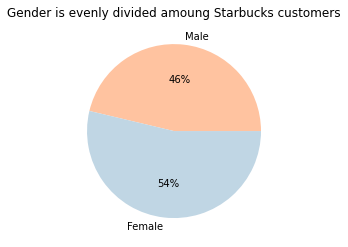

In [4]:
# calling function to generate visual
e.gender_pie(df)

#### What is the age distribution of Starbucks customers?

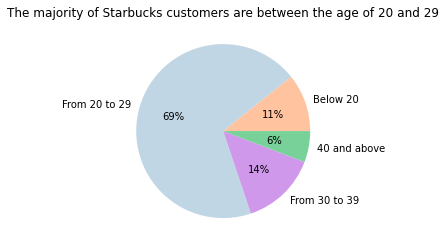

In [5]:
# calling function to generate visual 
e.age_pie(df)

#### What is the employment distribution of Starbucks customers?

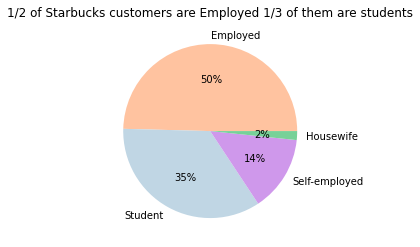

In [6]:
# calling function to generate visual
e.employment_pie(df)

#### What is the income distribution of Starbucks customers?

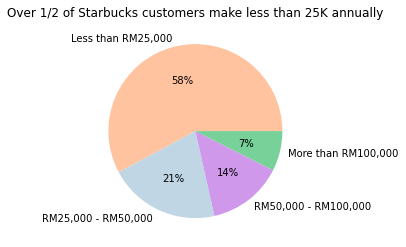

In [7]:
# calling function to generate visual
e.income_pie(df)

#### How often do Starbucks customers visit Satrbucks?

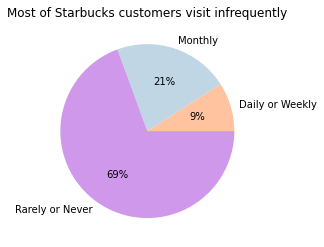

In [8]:
# calling function to generate visual
e.visit_pie(df)

### How many customers live near a Starbucks?

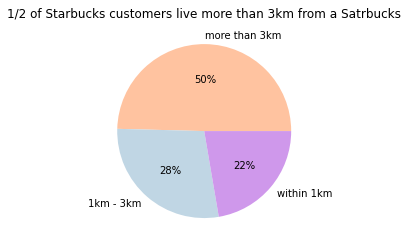

In [9]:
# calling function to generate visual
e.distance_pie(df)

### How much do Customers Spend at Starbucks per visit?

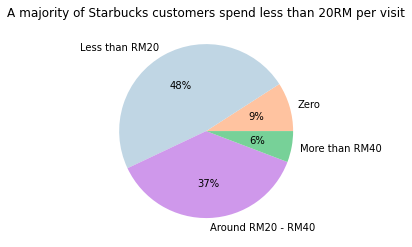

In [10]:
# calling function to generate visual
e.spend_pie(df)

### Majority of Starbucks customers:
* Are young adults aged 20-29
* Make less than RM25,000 annually
* Live more than 3 KM form a Starbucks
* Visit less than once a month
* Spend less than RM20 per visit

### Other findings:
* 1/3 of customers are students and 1/2 are employed in unknown fields
* Customers are nearly evenly split between male and female

### Follow up questions for latter inquiry?
* Do customers that live near Starbucks visit more frequiently?
* Do customers that spend differint amounts per visit represent differint customer groups?
* Do differint Employment types represent differint customer groups?
* Do customers who dine-in spend more?

### A note on Malaysian income:

It is difficult to interpret how servey results regarding income as they are in a currency that is unfamiliar to me.

Malaysia classifies income into three brackets delineating the bottom and middle 40%, and the top 20% of household incomes.

#### The ranges are:

* RM0-RM4,850 for the bottom tier (40%)
* RM4,850-RM8,700 for the mid tier (40%)
* RM8,701-more than RM15,041 for the top tire (20%)

According to the Income Classification in Malaysia: What is B40, M40, and T20 by Rebecca Hani Romeli, a living wage in Malaysia would be RM2,700 per month or RM32,400 per year, almost four times the cutoff for the top 20% of earners.

Because 42% of Starbucks customer base makes more than RM25,000 it would seem that it is serving the top income earners in it's area. a fact that might escape one who looks at the 58% that is below this number. We must keep in mind that a customer who earns less than RM25,000 is still in the top 20% of income earning households, though as suggested above being in the top 20% of earners does not garentee the RM32,400 one would need for a living wage.  

In [11]:
df.dining_type.value_counts()

Take away     49
Dine in       46
Drive-thru    20
Never          6
Name: dining_type, dtype: int64

### Part II: Why do customers come to Starbucks?

* visit_length
* dining_type
* most_frequent_purchase
* promotion_importance
* gathering_likelyhood

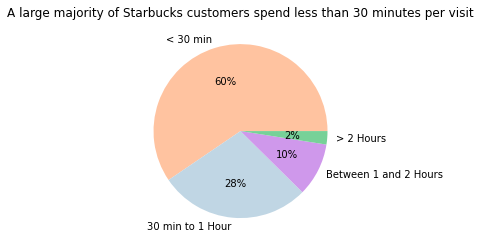

In [12]:
# set values and labels for chart
values = [len(df.visit_length[df.visit_length == 'Below 30 minutes']), 
          len(df.visit_length[df.visit_length == 'Between 30 minutes to 1 hour']),
          len(df.visit_length[df.visit_length == 'Between 1 hour to 2 hours']),
          len(df.visit_length[(df.visit_length == 'Between 2 hours to 3 hours') 
                            | (df.visit_length == 'More than 3 hours')])]

labels = ['< 30 min','30 min to 1 Hour', 'Between 1 and 2 Hours', '> 2 Hours'] 

# generate and show chart
plt.pie(values, labels=labels, autopct='%.0f%%', colors=['#ffc3a0', '#c0d6e4', '#cf98eb', '#77d198'])
plt.title('A large majority of Starbucks customers spend less than 30 minutes per visit')
plt.show()

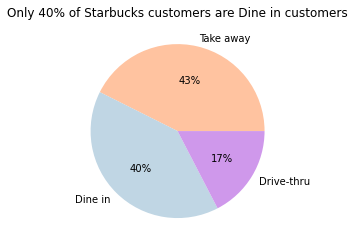

In [13]:
# set values and labels for chart
values = [len(df.dining_type[df.dining_type == 'Take away']), 
          len(df.dining_type[df.dining_type == 'Dine in']),
          len(df.dining_type[df.dining_type == 'Drive-thru'])]

labels = ['Take away','Dine in', 'Drive-thru'] 

# generate and show chart
plt.pie(values, labels=labels, autopct='%.0f%%', colors=['#ffc3a0', '#c0d6e4', '#cf98eb'])
plt.title('Only 40% of Starbucks customers are Dine in customers')
plt.show()

* 60% of customers place pick up orders 

In [14]:
df.most_frequent_purchase.value_counts()

Coffee                                           65
Cold drinks                                      25
Coffee;Pastries                                   6
Coffee;Cold drinks                                6
Coffee;Sandwiches                                 3
Pastries                                          2
Cold drinks;Juices;Pastries                       2
Cold drinks;Never                                 1
cake                                              1
Jaws chip                                         1
Cold drinks;Pastries;Sandwiches                   1
Coffee;Pastries;Sandwiches                        1
Coffee;Cold drinks;Juices;Pastries;Sandwiches     1
Coffee;Cold drinks;Pastries;Sandwiches            1
never                                             1
Coffee;Juices;Pastries;Sandwiches                 1
Cold drinks;Pastries                              1
Nothing                                           1
Never                                             1
Name: most_f

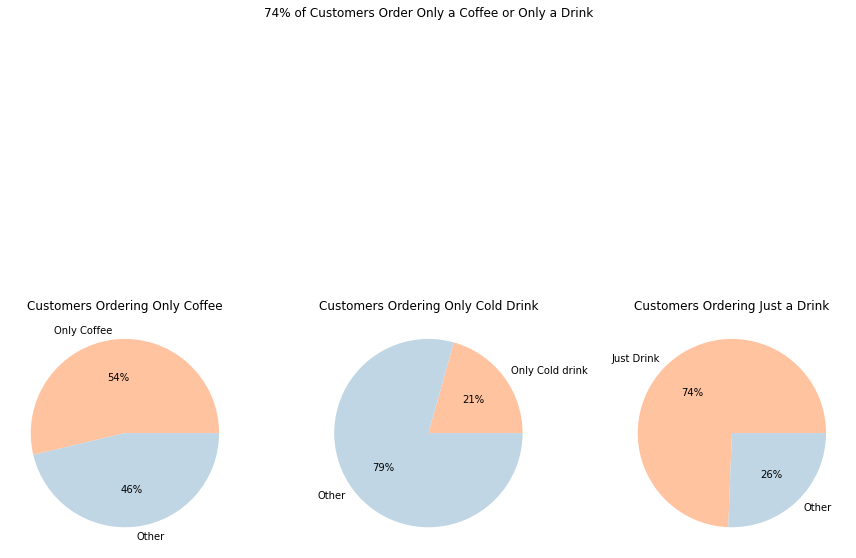

In [39]:
# Create three Pie chart subplots in one figgure showing only drink buying habbits

# define figure size and title
plt.figure(figsize=(12,12))
plt.suptitle('74% of Customers Order Only a Coffee or Only a Drink')

# first subplot
plt.subplot(1,3,1)

# define values and labels
values = [len(df.most_frequent_purchase[df.most_frequent_purchase == 'Coffee']),
          len(df.most_frequent_purchase[df.most_frequent_purchase != 'Coffee'])]
labels = ['Only Coffee', 'Other']

# make chart and add subtitle 
plt.pie(values, labels=labels, autopct='%.0f%%', colors=['#ffc3a0', '#c0d6e4'])
plt.title('Customers Ordering Only Coffee')

# second subplot
plt.subplot(1,3,2)

# define values and labels
values = [len(df.most_frequent_purchase[df.most_frequent_purchase == 'Cold drinks']),
          len(df.most_frequent_purchase[df.most_frequent_purchase != 'Cold drinks'])]
labels = ['Only Cold drink', 'Other']

# make chart and add subtitle
plt.pie(values, labels=labels, autopct='%.0f%%', colors=['#ffc3a0', '#c0d6e4'])
plt.title('Customers Ordering Only Cold Drink')

# third subplot
plt.subplot(1,3,3)

# define values and labels
values = [len(df.most_frequent_purchase[(df.most_frequent_purchase == 'Coffee')
                                           | (df.most_frequent_purchase == 'Cold drinks')]),
          len(df.most_frequent_purchase[(df.most_frequent_purchase != 'Coffee')
                                           & (df.most_frequent_purchase != 'Cold drinks')])]
labels = ['Just Drink', 'Other']

# make chart and add subtitle
plt.pie(values, labels=labels, autopct='%.0f%%', colors=['#ffc3a0', '#c0d6e4'])
plt.title('Customers Ordering Just a Drink')

# print figgure
plt.tight_layout()
plt.show()

In [20]:
df.columns

Index(['gender', 'age_group', 'employment_status', 'annual_income_group',
       'visit_frequency', 'dining_type', 'visit_length', 'distance_away',
       'membership_card', 'most_frequent_purchase', 'spend_per_visit',
       'brand_rating', 'price_rating', 'promotion_importance',
       'ambiance_rating', 'wifi_rating', 'service_rating',
       'gathering_likelyhood', 'promotions_from', 'continue_buying', 'Coffee',
       'Cold drinks', 'Pastries', 'Sandwiches', 'Juices'],
      dtype='object')

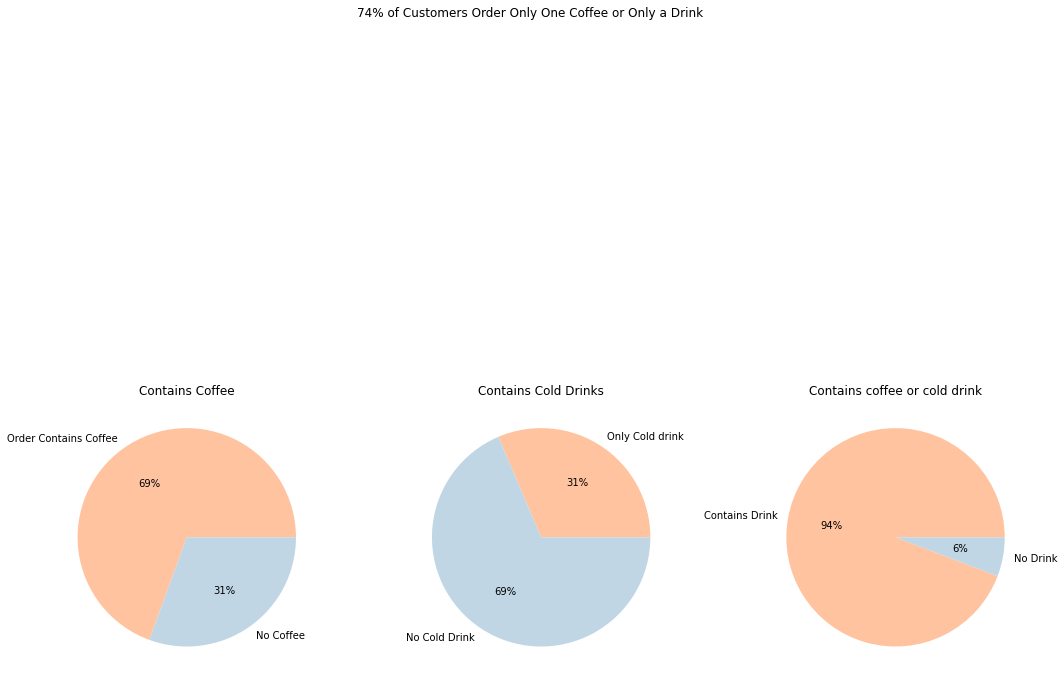

In [34]:
# Create three Pie chart subplots in one figgure showing containing drink buying habbits

# define figure size and title
plt.figure(figsize=(15,15))
plt.suptitle('74% of Customers Order Only One Coffee or Only a Drink')

# first subplot
plt.subplot(1,3,1)

# define values and labels
values = [len(df.Coffee[df.Coffee == True]),
          len(df.Coffee[df.Coffee == False])]
labels = ['Order Contains Coffee', 'No Coffee']

# make chart and add subtitle 
plt.pie(values, labels=labels, autopct='%.0f%%', colors=['#ffc3a0', '#c0d6e4'])
plt.title('Contains Coffee')

# second subplot
plt.subplot(1,3,2)

# define values and labels
values = [len(df['Cold drinks'][df['Cold drinks'] == True]),
          len(df['Cold drinks'][df['Cold drinks'] == False])]
labels = ['Only Cold drink', 'No Cold Drink']

# make chart and add subtitle
plt.pie(values, labels=labels, autopct='%.0f%%', colors=['#ffc3a0', '#c0d6e4'])
plt.title('Contains Cold Drinks')

# third subplot
plt.subplot(1,3,3)

# define values and labels
values = [len(df.most_frequent_purchase[(df.Coffee == True) | (df['Cold drinks'] == True)]),
          len(df.most_frequent_purchase[(df.Coffee == False) & (df['Cold drinks'] == False)])
         ]
labels = ['Contains Drink', 'No Drink']

# make chart and add subtitle
plt.pie(values, labels=labels, autopct='%.0f%%', colors=['#ffc3a0', '#c0d6e4'])
plt.title('Contains coffee or cold drink')

# print figgure
plt.tight_layout()
plt.show()

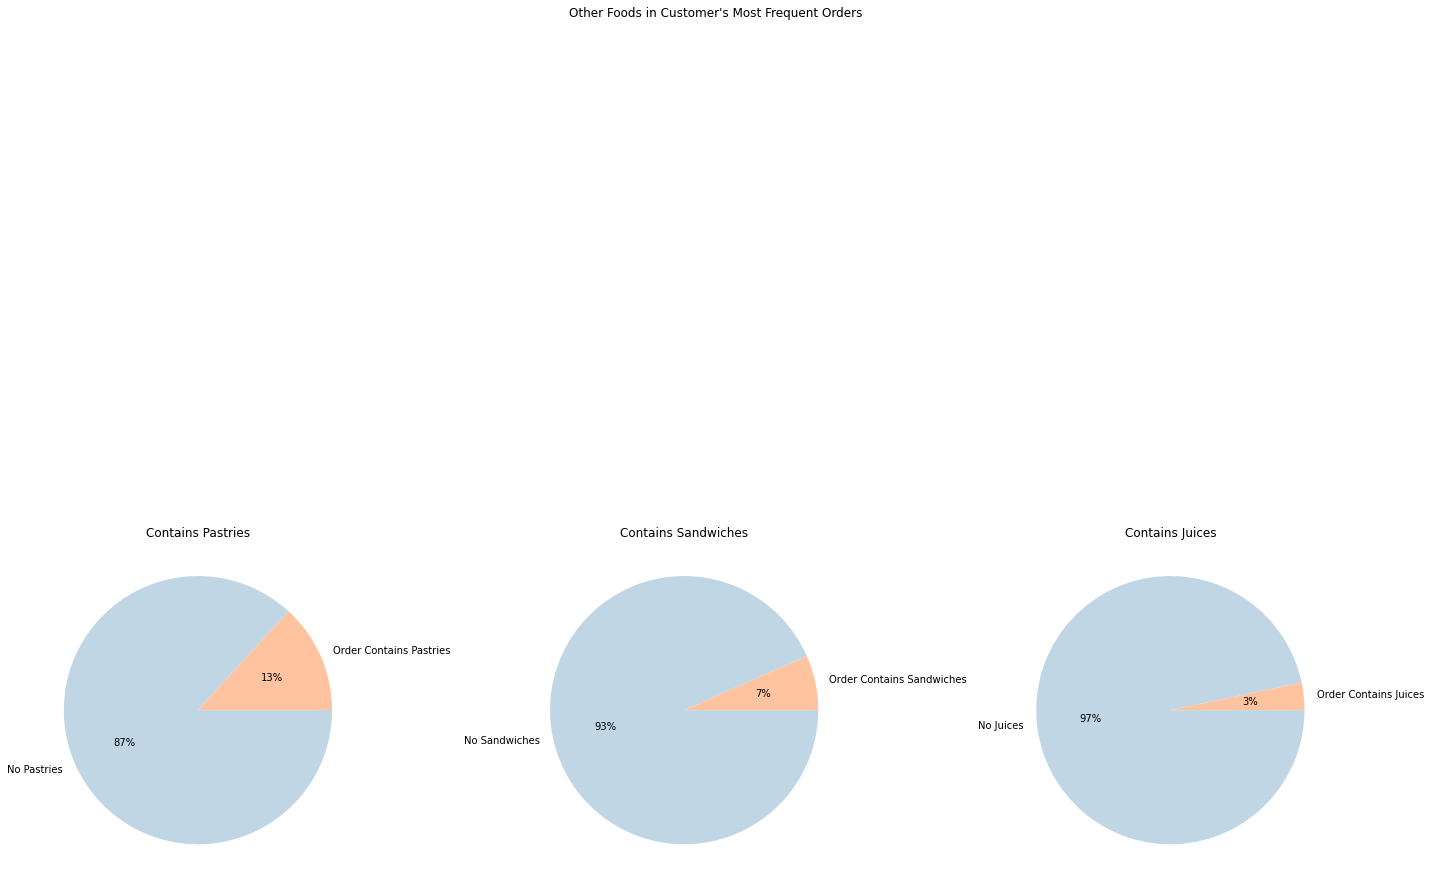

In [36]:
foods = ['Pastries', 'Sandwiches', 'Juices']

i = 0

# define figure size and title
plt.figure(figsize=(20,20))
plt.suptitle("Other Foods in Customer's Most Frequent Orders")

for food in foods:

    # first subplot
    plt.subplot(1,3,i+1)

    # define values and labels
    values = [len(df[f'{food}'][df[f'{food}'] == True]),
              len(df[f'{food}'][df[f'{food}'] == False])]
                                         
    labels = [f'Order Contains {food}', f'No {food}']

    # make chart and add subtitle 
    plt.pie(values, labels=labels, autopct='%.0f%%', colors=['#ffc3a0', '#c0d6e4'])
    plt.title(f'Contains {food}')
              
    i += 1
              
# print figgure
plt.tight_layout()
plt.show()

In [37]:
df.promotion_importance.value_counts()

4    42
5    37
3    30
2     7
1     5
Name: promotion_importance, dtype: int64